# PEMROSESAN BAHASA ALAMI A

Kelompok :

- 200411100074	  Hambali Fitrianto
- 200411100042	  Pramudya Dwi Febrianto
- 200411100106	  Febrian Achmad Syahputra

# Ekstraksi Fitur

In [ ]:
# mengimpor pustaka Pandas & NumPy
import pandas as pd 
import numpy as np

In [ ]:
# Fungsi read_csv() dari Pandas digunakan untuk membaca file CSV dan mengonversinya menjadi struktur data DataFrame
dataset = pd.read_csv("https://raw.githubusercontent.com/Feb11F/dataset/main/dieng_sentiment_pn.csv")
# Fungsi head() digunakan untuk memperoleh tampilan awal dari DataFrame dengan jumlah baris yang ditentukan (secara default 5 baris).
dataset.head()

,web-scraper-order,web-scraper-start-url,nama,caption,ulasan,ulasan_preprocessed,label,sentiment,score
0,1680415691-1,https://www.tripadvisor.com/ShowUserReviews-g1...,Meyrisca,Sejuk-Tenang,Keadaan kota kecil ini tenang dg udara yg seju...,kota tenang dg udara yg sejuk . mengunjungi yg...,negative,"[{'label': 'negative', 'score': 0.924965679645...",0.924966
1,1680415691-2,https://www.tripadvisor.com/ShowUserReviews-g1...,wikipedieng,Tempat indah untuk melihat pemandangan hijau,"terletak di Jawa Tengah, dataran tinggi Dieng ...","terletak jawa , dataran dieng menyuguhkan pano...",positive,"[{'label': 'positive', 'score': 0.908020257949...",0.908020
2,1680415691-3,https://www.tripadvisor.com/ShowUserReviews-g1...,Danrltf,Lovely place,2x ke dieng. Tempat yang luar biasa. Nice weat...,2x dieng . luarbiasa . nice weather . good ath...,negative,"[{'label': 'negative', 'score': 0.847250521183...",0.847251
3,1680415691-4,https://www.tripadvisor.com/ShowUserReviews-g1...,RentCarJakarta,Rekomendasi liburan disini,Dieng...\nAdalah dataran tinggi dan terkenal d...,dieng ... dataran terken negeri awan awan loka...,negative,"[{'label': 'negative', 'score': 0.770197510719...",0.770198
4,1680415691-5,https://www.tripadvisor.com/ShowUserReviews-g1...,travelerpg32,Wisata Alam Awesome,"Selain suhunya yang dingin, Wisata Candi, Kawa...","suhunya dingin , wisata candi , kawah sikidang...",positive,"[{'label': 'positive', 'score': 0.976155519485...",0.976156


#Case Folding

Case folding adalah proses dalam pemrosesan teks yang mengubah semua huruf dalam teks menjadi huruf kecil atau huruf besar. Tujuan dari case folding adalah untuk mengurangi variasi yang disebabkan oleh perbedaan huruf besar dan kecil dalam teks, sehingga mempermudah pemrosesan teks secara konsisten.

Dalam case folding, biasanya semua huruf dalam teks dikonversi menjadi huruf kecil dengan menggunakan metode seperti lowercasing. Dengan demikian, perbedaan antara huruf besar dan huruf kecil tidak lagi diperhatikan dalam analisis teks, sehingga memungkinkan untuk mendapatkan hasil yang lebih konsisten dan mengurangi kompleksitas dalam pemrosesan teks.

In [ ]:
# mengubah semua karakter dalam kolom 'ulasan' menjadi huruf kecil (lowercase).
# menggunakan fungsi Series.str.lower() pada Pandas
dataset['ulasan'] = dataset['ulasan'].str.lower()

print('Case Folding Result : \n')
print(dataset['ulasan'].head())
# print('\n\n\n')

Case Folding Result : 

0    keadaan kota kecil ini tenang dg udara yg seju...
1    terletak di jawa tengah, dataran tinggi dieng ...
2    2x ke dieng. tempat yang luar biasa. nice weat...
3    dieng...\nadalah dataran tinggi dan terkenal d...
4    selain suhunya yang dingin, wisata candi, kawa...
Name: ulasan, dtype: object


## Tokenize


Tokenisasi adalah proses pemisahan teks menjadi unit-unit yang lebih kecil yang disebut token. Token dapat berupa kata, frasa, atau simbol lainnya, tergantung pada tujuan dan aturan tokenisasi yang digunakan.

Tujuan utama tokenisasi dalam pemrosesan bahasa alami (Natural Language Processing/NLP) adalah untuk memecah teks menjadi unit-unit yang lebih kecil agar dapat diolah lebih lanjut, misalnya dalam analisis teks, pembentukan model bahasa, atau klasifikasi teks.

Ditahap ini akan dilakukan proses number removal, whitecase removal, puntuation removal dan word_tokenize() untuk memecah string kedalam tokens. Pandas Dataframe atau Series mampu menjalankan function external untuk di terapkan pada kolom atau baris dengan menggunakan fungsi .apply() .

In [ ]:
# mengimpor pustaka NLTK
import nltk
# mengunduh data punkt yang digunakan untuk tokenisasi kalimat
nltk.download('punkt')
# mengimpor pustaka string yang berisi karakter-karakter tanda baca
import string 
# mengimpor pustaka re (regular expression) yang digunakan untuk pencocokan pola dan pemrosesan teks
import re
# mengimpor kelas RegexpTokenizer dari pustaka NLTK yang digunakan untuk tokenisasi dengan pola yang disesuaikan
from nltk.tokenize import RegexpTokenizer
# mengimpor fungsi word_tokenize dari pustaka NLTK yang digunakan untuk tokenisasi kata
from nltk.tokenize import word_tokenize
# mengimpor kelas FreqDist dari pustaka NLTK yang digunakan untuk menghitung frekuensi kata
from nltk.probability import FreqDist

# fungsi hapus_tweet_khusus : menghapus karakter khusus yang umumnya ditemukan dalam teks dari media sosial
def hapus_tweet_khusus(text):
    # menggunakan metode replace() pada objek string text untuk mengganti semua karakter \t (tab) \n (newline) \u dengan spasi kosong.
    # menghapus semua karakter \ (backslash).
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # mengubah teks menjadi representasi ASCII dengan mengganti karakter non-ASCII dengan tanda tanya (?). Ini berguna jika ada karakter non-ASCII yang perlu dihilangkan atau diganti
    text = text.encode('ascii', 'replace').decode('ascii')
    # fungsi re.sub() pada modul re digunakan untuk melakukan substitusi pola dalam teks dengan string pengganti
    # [@#][A-Za-z0-9]+ adalah pola yang mencocokkan tagar (#) dan mention (@) diikuti oleh karakter-karakter huruf atau angka.
    # \w+:\/\/\S+ adalah pola yang mencocokkan URL yang diawali dengan kombinasi karakter huruf, angka, atau underscore (\w) diikuti oleh "://", dan diikuti oleh satu atau lebih karakter non-spasi (\S).
    # metode join() menggabungkan kata-kata dalam daftar dengan menggunakan spasi sebagai pemisah, menghasilkan teks tanpa spasi berlebih
    # metode split() unutuk membagi teks menjadi daftar kata berdasarkan spasi. Ini akan menghapus spasi berlebih dan menghasilkan daftar kata yang tersusun dengan benar.
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # menggantikan string "http://" dan "https://" dengan spasi kosong.
    # tujuannya adalah untuk menghapus tautan URL yang mungkin masih tersisa setelah langkah sebelumnya
    return text.replace("http://", " ").replace("https://", " ")
                
dataset['ulasan'] = dataset['ulasan'].apply(hapus_tweet_khusus)

# fungsi hapus_nomor : menghapus semua angka dari teks
def hapus_nomor(text):
    # fungsi re.sub() akan mengganti semua angka yang cocok dengan string kosong (menghapusnya).
    # fungsi ini akan mengembalikan teks yang telah dihapus angka-angkanya
    # \d+ adalah pola yang mencocokkan satu atau lebih angka.
    # dalam pola ini, semua angka dalam teks akan cocok dengan pola dan digantikan dengan string pengganti kosong, yaitu dihapus.
    return  re.sub(r"\d+", "", text)
# apply() mengambil argumen sebagai array.
dataset['ulasan'] = dataset['ulasan'].apply(hapus_nomor)

# fungsi hapus_tanda_baca : menghapus tanda baca dari teks
def hapus_tanda_baca(text):
    # fungsi translate() digunakan untuk menerapkan translasi karakter pada suatu string
    # str.maketrans() untuk membuat tabel translasi yang menghubungkan setiap tanda baca dalam string.punctuation dengan string kosong
    # tabel translasi dibuat dengan parameter pertama ("") yang menunjukkan karakter apa yang akan diganti, dan parameter kedua string.punctuation adalah string yang berisi semua tanda baca yang ingin dihapus.
    # string.punctuation adalah konstanta string yang berisi semua karakter tanda baca yang umum digunakan.
    # !"#$%&'()*+, -./:;<=>?@[\]^_`{|}~
    return text.translate(str.maketrans("","",string.punctuation))
    # Atau menggunakan modul re
    # return re.sub(r'[^\w\s]', '', text)

dataset['ulasan'] = dataset['ulasan'].apply(hapus_tanda_baca)

# fungsi hapus_whitespace_LT : menghapus spasi yang berada di sebelah kiri dan kanan teks
def hapus_whitespace_LT(text):
    # metode strip() digunakan untuk menghapus spasi di sebelah kiri dan kanan teks
    # berfungsi untuk menghilangkan spasi ekstra yang mungkin ada sebelum atau setelah teks
    # kemudian mengembalikan teks yang telah dimodifikasi
    return text.strip()

dataset['ulasan'] = dataset['ulasan'].apply(hapus_whitespace_LT)

# fungsi hapus_whitespace_multiple : menggantikan multiple whitespace (ruang kosong berulang) dengan satu spasi tunggal pada teks yang diberikan sebagai argumen
def hapus_whitespace_multiple(text):
    # fungsi re.sub() pada modul re digunakan untuk melakukan substitusi pola dalam teks dengan string pengganti
    # \s+, yang merupakan ekspresi reguler untuk mencocokkan satu atau lebih spasi (whitespace)
    # penggunaan ' ' sebagai string pengganti berarti bahwa spasi tunggal akan digunakan untuk menggantikan setiap pola yang cocok (multiple whitespace)
    # mengembalikan teks yang telah dimodifikasi.
    return re.sub('\s+',' ',text)

dataset['ulasan'] = dataset['ulasan'].apply(hapus_whitespace_multiple)

# fungsi hapus_single_char memiliki tujuan untuk menghapus karakter tunggal (single character) yang terdiri dari huruf dari teks yang diberikan sebagai argumen
def hapus_single_char(text):
    # \b: Mencocokkan batas kata (word boundary). Digunakan untuk memastikan bahwa karakter tunggal yang dicocokkan tidak terikat dengan karakter lain di sekitarnya.
    # [a-zA-Z]: Mencocokkan satu karakter tunggal yang merupakan huruf. Ekspresi [a-zA-Z] mengacu pada karakter huruf dari A hingga Z baik dalam huruf besar maupun huruf kecil.
    # fungsi re.sub() kemudian digunakan untuk menggantikan karakter tunggal yang cocok dengan string kosong (""). Dengan demikian, karakter tunggal yang terdiri dari huruf akan dihapus dari teks.
    return re.sub(r"\b[a-zA-Z]\b", "", text)

dataset['ulasan'] = dataset['ulasan'].apply(hapus_single_char)

# fungsi word_tokenize_wrapper digunakan untuk melakukan tokenisasi (memecah teks menjadi token)
def word_tokenize_wrapper(text):
    # fungsi RegexpTokenizer() pada modul nltk.tokenize digunakan untuk membuat objek tokenizer yang menggunakan ekspresi reguler sebagai pola pemisah
    # Pola yang digunakan adalah 'dataran\s+tinggi|jawa\s+tengah|[\w\']+'.'dataran\s+tinggi' dan 'jawa\s+tengah' adalah pola untuk mencocokkan kata "dataran tinggi" dan "jawa tengah" secara spesifik.
    # [\w\']+ adalah pola untuk mencocokkan kata-kata yang terdiri dari huruf, angka, atau tanda petik tunggal (').
    tokenizer = RegexpTokenizer('dataran\s+tinggi|jawa\s+tengah|[\w\']+')
    # ungsi tokenize() digunakan pada objek tokenizer untuk memecah teks menjadi token menggunakan pola yang telah ditentukan sebelumnya
    tokens = tokenizer.tokenize(text)
    # mengembalikan daftar token yang telah dibentuk dari teks.
    return tokens

dataset['ulasan_tokens'] = dataset['ulasan'].apply(word_tokenize_wrapper)

print('Tokenizing Result : \n') 
print(dataset['ulasan_tokens'].head())
# print('\n\n\n')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Tokenizing Result : 

0    [keadaan, kota, kecil, ini, tenang, dg, udara,...
1    [terletak, di, jawa tengah, dataran tinggi, di...
2    [ke, dieng, tempat, yang, luar, biasa, nice, w...
3    [dieng, adalah, dataran tinggi, dan, terkenal,...
4    [selain, suhunya, yang, dingin, wisata, candi,...
Name: ulasan_tokens, dtype: object


hasil fungsi word_tokenize() disimpan pada kolom terpisah dengan nama ['ulasan_tokens'] . 

In [ ]:
# NLTK calc frequency distribution
def freqDist_wrapper(text):
    return FreqDist(text)

dataset['ulasan_tokens_fdist'] = dataset['ulasan_tokens'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(dataset['ulasan_tokens_fdist'].head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(ada, 4), (yg, 3), (semakin, 2), (kita, 2), (...
1    [(dieng, 2), (yang, 2), (untuk, 2), (terletak,...
2    [(dieng, 4), (ke, 2), (yang, 2), (luar, 2), (b...
3    [(dieng, 6), (ke, 6), (dan, 5), (di, 5), (bisa...
4    [(kawah, 3), (yang, 2), (wisata, 2), (sikidang...
Name: ulasan_tokens_fdist, dtype: object


menghitung frekuensi distribusi token pada tiap row data pada Dataframe dengan menggunakan fungsi .freqDist() kedalam fungsi .apply() .

Pada tahap ini kita akan menggunakan stopword bahasa indonesia yang didapatkan dari library NLTK untuk filtering terhadap Dataframe. Kita juga dapat menambahkan list stopword dengan menggunakan fungsi .extend() terhadap list_stopword , penggunaan fungsi .set() bermanfaat untuk membuat iterable list menjadi sequence iterable element. Hasilnya kita dapat mempercepat proses pengecekan apakan sebuah token terdapat pada list_stopword atau tidak (if token not in list_stopword:).

## Filtering (Stopword Removal)


Filtering atau Stopword Removal adalah proses penghapusan kata-kata yang dianggap tidak memiliki makna atau kontribusi yang signifikan dalam analisis teks. Kata-kata tersebut disebut sebagai stop words atau stopwords.

Stopwords biasanya terdiri dari kata-kata umum seperti "a", "an", "the", "is", "in", "on", "and", "or", dll. Kata-kata ini sering muncul dalam teks namun memiliki sedikit kontribusi dalam pemahaman konten atau pengambilan informasi penting dari teks.

Tujuan dari Filtering atau Stopword Removal adalah untuk membersihkan teks dari kata-kata yang tidak penting sehingga fokus dapat diarahkan pada kata-kata kunci yang lebih informatif dalam analisis teks. Dengan menghapus stopwords, kita dapat mengurangi dimensi data, meningkatkan efisiensi pemrosesan, dan memperbaiki kualitas hasil analisis.

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')


# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

# ----------------------- add stopword from txt file ------------------------------------
# read txt stopword using pandas
txt_stopword = pd.read_csv("https://raw.githubusercontent.com/masdevid/ID-Stopwords/master/id.stopwords.02.01.2016.txt", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# ---------------------------------------------------------------------------------------

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

dataset['ulasan_tokens_WSW'] = dataset['ulasan_tokens'].apply(stopwords_removal) 


print(dataset['ulasan_tokens_WSW'].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    [kota, tenang, udara, sejuk, mengunjungi, meni...
1    [terletak, jawa tengah, dataran tinggi, dieng,...
2    [dieng, nice, weather, good, athmosphere, peng...
3    [dieng, dataran tinggi, terkenal, negeri, awan...
4    [suhunya, dingin, wisata, candi, kawah, sikida...
Name: ulasan_tokens_WSW, dtype: object


In [ ]:
pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.9/830.9 kB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.0 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16299 sha256=02260ffc23217db4eb8ea96eb1e594d6effbea9ceade7a9c008909130f4adf7d
  Stored in directory: /root/.cache/pip/wheels/6c/bd/3e/2d6afc9bc36c9975f8e4215a270bbac6580c4361ebd6bb2323
Successfully built swifter


In [ ]:
pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.4 MB/s eta 0:00:00


## Normalisasi

Normalisasi dalam pemrosesan bahasa alami (Natural Language Processing/NLP) adalah proses mengubah teks menjadi bentuk standar yang lebih terstruktur atau terstandarisasi. Tujuan normalisasi adalah untuk mengurangi variasi dalam teks sehingga informasi yang terkandung di dalamnya dapat lebih mudah diproses dan dianalisis.

In [ ]:
# normalizad_word = pd.read_csv("https://raw.githubusercontent.com/jbkalit/Sentiment-Analysis-Final-Project/master/normalisasi.csv")

# normalizad_word_dict = {}

# for index, row in normalizad_word.iterrows():
#     if row[0] not in normalizad_word_dict:
#         normalizad_word_dict[row[0]] = row[1] 

# def normalized_term(document):
#     return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

# dataset['ulasan_normalized'] = dataset['ulasan_tokens_WSW'].apply(normalized_term)

# dataset['ulasan_normalized'].head(10)

## Stemming


Stemming dalam pemrosesan bahasa alami (Natural Language Processing/NLP) adalah proses mengubah kata ke dalam bentuk dasarnya atau bentuk kata yang lebih sederhana, yang disebut sebagai "stem". Stemming bertujuan untuk menghapus infleksi atau imbuhan pada kata sehingga kata-kata yang memiliki akar kata yang sama dapat diidentifikasi sebagai bentuk yang setara.

Ditahap ini kita akan .apply() function stemmer dari library Sastrawi untuk mengembalikan kata kebentuk dasarnya. Karena fungsi stemmer.stem() pada library Sastrawi lambat, kita dapat menggunakan library swifter untuk mempercepat froses stemming pada Dataframe dengan menjalankan task secara parallel. Kecepatan pemrosesan bisa dua kali bahkan lebih cepat jika tanpa menggunakan swifter. Hal ini bergantung pada jumlah core yang dimiliki oleh komputer yang kita gunakan, defaultnya akan digunakan npartitions = cpu_count()*2.

In [ ]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in dataset['ulasan_tokens_WSW']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

dataset['ulasan_tokens_stemmed'] = dataset['ulasan_tokens_WSW'].swifter.apply(get_stemmed_term)


2791
------------------------
kota : kota
tenang : tenang
udara : udara
sejuk : sejuk
mengunjungi : unjung
menikmati : nikmat
pemandangan : pandang
indah : indah
danau : danau
gunung : gunung
awan : awan
jarak : jarak
sunrise : sunrise
terletak : letak
jawa tengah : jawa tengah
dataran tinggi : datar tinggi
dieng : dieng
menyuguhkan : suguh
panorama : panorama
alam : alam
warna : warna
warni : warni
situs : situs
bersejarah : sejarah
kawah : kawah
melegenda : legenda
pendakian : daki
bukit : bukit
sikunir : sikunir
golden : golden
plateau : plateau
tujuan : tuju
favorit : favorit
nice : nice
weather : weather
good : good
athmosphere : athmosphere
pengalaman : alam
explore : explore
acara : acara
culture : culture
festival : festival
prau : prau
telaga : telaga
batu : batu
ratapan : ratap
angin : angin
dll : dll
rindu : rindu
banget : banget
wisata : wisata
candu : candu
terkenal : kenal
negeri : negeri
lokasi : lokasi
puncak : puncak
sikidang : sikidang
candi : candi
arjuna : arjuna
ru

Pandas Apply:   0%|          | 0/238 [00:00<?, ?it/s]

In [ ]:
print(dataset['ulasan_tokens_stemmed'])

0      [kota, tenang, udara, sejuk, unjung, nikmat, p...
1      [letak, jawa tengah, datar tinggi, dieng, sugu...
2      [dieng, nice, weather, good, athmosphere, alam...
3      [dieng, datar tinggi, kenal, negeri, awan, awa...
4      [suhu, dingin, wisata, candi, kawah, sikidang,...
                             ...                        
233    [ribu, manusia, penuh, kompleks, celataran, ko...
234    [datar tinggi, dieng, manja, pandang, hijaun, ...
235    [dieng, plateau, sempurna, jadi, wisata, banya...
236    [dieng, wisata, wisata, komplit, sana, danau, ...
237    [sungguh, wisata, kesan, heran, dieng, tereksp...
Name: ulasan_tokens_stemmed, Length: 238, dtype: object


In [ ]:
dataset.head()

,web-scraper-order,web-scraper-start-url,nama,caption,ulasan,ulasan_preprocessed,label,sentiment,score,ulasan_tokens,ulasan_tokens_fdist,ulasan_tokens_WSW,ulasan_tokens_stemmed
0,1680415691-1,https://www.tripadvisor.com/ShowUserReviews-g1...,Meyrisca,Sejuk-Tenang,keadaan kota kecil ini tenang dg udara yg seju...,kota tenang dg udara yg sejuk . mengunjungi yg...,negative,"[{'label': 'negative', 'score': 0.924965679645...",0.924966,"[keadaan, kota, kecil, ini, tenang, dg, udara,...","{'keadaan': 1, 'kota': 1, 'kecil': 1, 'ini': 1...","[kota, tenang, udara, sejuk, mengunjungi, meni...","[kota, tenang, udara, sejuk, unjung, nikmat, p..."
1,1680415691-2,https://www.tripadvisor.com/ShowUserReviews-g1...,wikipedieng,Tempat indah untuk melihat pemandangan hijau,terletak di jawa tengah dataran tinggi dieng m...,"terletak jawa , dataran dieng menyuguhkan pano...",positive,"[{'label': 'positive', 'score': 0.908020257949...",0.908020,"[terletak, di, jawa tengah, dataran tinggi, di...","{'terletak': 1, 'di': 1, 'jawa tengah': 1, 'da...","[terletak, jawa tengah, dataran tinggi, dieng,...","[letak, jawa tengah, datar tinggi, dieng, sugu..."
2,1680415691-3,https://www.tripadvisor.com/ShowUserReviews-g1...,Danrltf,Lovely place,ke dieng tempat yang luar biasa nice weather ...,2x dieng . luarbiasa . nice weather . good ath...,negative,"[{'label': 'negative', 'score': 0.847250521183...",0.847251,"[ke, dieng, tempat, yang, luar, biasa, nice, w...","{'ke': 2, 'dieng': 4, 'tempat': 1, 'yang': 2, ...","[dieng, nice, weather, good, athmosphere, peng...","[dieng, nice, weather, good, athmosphere, alam..."
3,1680415691-4,https://www.tripadvisor.com/ShowUserReviews-g1...,RentCarJakarta,Rekomendasi liburan disini,dieng adalah dataran tinggi dan terkenal denga...,dieng ... dataran terken negeri awan awan loka...,negative,"[{'label': 'negative', 'score': 0.770197510719...",0.770198,"[dieng, adalah, dataran tinggi, dan, terkenal,...","{'dieng': 6, 'adalah': 1, 'dataran tinggi': 1,...","[dieng, dataran tinggi, terkenal, negeri, awan...","[dieng, datar tinggi, kenal, negeri, awan, awa..."
4,1680415691-5,https://www.tripadvisor.com/ShowUserReviews-g1...,travelerpg32,Wisata Alam Awesome,selain suhunya yang dingin wisata candi kawah ...,"suhunya dingin , wisata candi , kawah sikidang...",positive,"[{'label': 'positive', 'score': 0.976155519485...",0.976156,"[selain, suhunya, yang, dingin, wisata, candi,...","{'selain': 1, 'suhunya': 1, 'yang': 2, 'dingin...","[suhunya, dingin, wisata, candi, kawah, sikida...","[suhu, dingin, wisata, candi, kawah, sikidang,..."


## Menyimpan data hasil preprocessing

In [ ]:
dataset.to_csv("Text_Preprocessing.csv")

In [ ]:
dataset.to_excel("Text_Preprocessing.xlsx")

# TF-IDF

Ditahap akhir dari text preprocessing adalah term-weighting .Term-weighting merupakan proses pemberian bobot term pada dokumen. Pembobotan ini digunakan nantinya oleh algoritma Machine Learning untuk klasifikasi dokumen. Ada beberapa metode yang dapat digunakan, salah satunya adalah TF-IDF (Term Frequency-Inverse Document Frequency).

Sekarang kita mulai dengan terlebih dahulu menyiapkan data yang diperlukan. Kita akan gunakan file Text_Preprocessing.csv yang sebelumnya disimpan. Baca file tersebut menggunakan Pandas, kita hanya membutuhkan kolom label dan tweet_tokens_stemmed . Rename kolom pada Dataframe menjadi ["label", "ulasan"] .

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
Data_ulasan = pd.read_csv("Text_Preprocessing.csv", usecols=["label", 'ulasan_tokens_stemmed'])
Data_ulasan.columns = ["label", "ulasan"]

Data_ulasan.head()

,label,ulasan
0,negative,"['kota', 'tenang', 'udara', 'sejuk', 'unjung',..."
1,positive,"['letak', 'jawa tengah', 'datar tinggi', 'dien..."
2,negative,"['dieng', 'nice', 'weather', 'good', 'athmosph..."
3,negative,"['dieng', 'datar tinggi', 'kenal', 'negeri', '..."
4,positive,"['suhu', 'dingin', 'wisata', 'candi', 'kawah',..."


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Mengambil fitur ulasan dan label sentimen
ulasan = Data_ulasan['ulasan']
sentimen = Data_ulasan['label']

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(ulasan, sentimen, test_size=0.2, random_state=42)

jika kita cek, item pada kolom ulasan memiliki tipe data <class str> , kita perlu ubah string diatas menjadi list dan simpan pada Pandas Series ulasan_list,

In [ ]:

# convert list formated string to list
import ast

def convert_text_list(texts):
    texts = ast.literal_eval(texts)
    return [text for text in texts]

Data_ulasan["ulasan_list"] = Data_ulasan["ulasan"].apply(convert_text_list)


print(Data_ulasan["ulasan_list"][90])

print("\ntype : ", type(Data_ulasan["ulasan_list"][90]))

['kesini', 'dingin', 'milik', 'pilih', 'transportasi', 'lokasi', 'wisata', 'favorit', 'kenal', 'kabut', 'tipis', 'limut', 'kawasan', 'candi', 'dingin', 'gigit', 'candi', 'rasa', 'hangat', 'minum', 'ramu', 'ajaib', 'purwaceng']

type :  <class 'list'>


## TF (Term Frequency)

TF (Term Frequency) adalah ukuran yang menggambarkan seberapa sering sebuah kata muncul dalam suatu dokumen. Menghitung TF melibatkan perbandingan jumlah kemunculan kata dengan jumlah kata keseluruhan dalam dokumen.

### Perhitungan TF (Term Frequency):
TF(term) = (Jumlah kemunculan term dalam dokumen) / (Jumlah kata dalam dokumen)


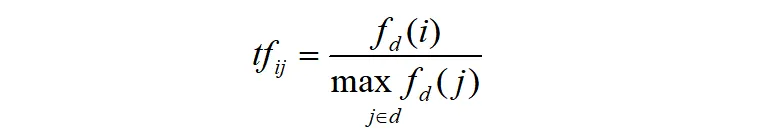

Membuat sebuah kamus kosong tf_dict untuk menyimpan frekuensi kemunculan kata-kata dalam korpus.

Dilakukan iterasi melalui setiap dokumen dalam korpus untuk memecah setiap dokumen menjadi kata-kata

Iterasi melalui setiap kata untuk memeriksa apakah kata tersebut sudah ada dalam kamus tf_dict. Jika kata belum ada, maka kata tersebut ditambahkan ke kamus dengan nilai awal 1. Jika kata sudah ada, maka nilai frekuensinya ditambahkan 1.

Setelah selesai menghitung frekuensi kemunculan kata dalam semua dokumen, lalu menghitung total frekuensi semua kata dihitung dengan total_words = sum(tf_dict.values()).

Iterasi melalui setiap kata dalam kamus untuk menghitung nilai TF untuk setiap kata dengan membagi frekuensi kemunculan kata tersebut dengan total frekuensi semua kata. Hasilnya disimpan kembali dalam kamus tf_dict.

In [ ]:
# Menghitung Term Frequency (TF)
def calculate_tf(corpus):
    tf_dict = {}
    for document in corpus:
        words = document.split()
        for word in words:
            if word not in tf_dict:
                tf_dict[word] = 1
            else:
                tf_dict[word] += 1
    total_words = sum(tf_dict.values())
    for word in tf_dict:
        tf_dict[word] = tf_dict[word] / total_words
    return tf_dict

## DF (Document Frequency)
DF (Document Frequency) adalah ukuran yang menggambarkan seberapa sering sebuah kata muncul dalam seluruh koleksi dokumen. DF menghitung jumlah dokumen yang mengandung kata tersebut.

### Perhitungan DF (Document Frequency):
DF(term) = Jumlah dokumen yang mengandung term

In [ ]:
# Menghitung Document Frequency (DF)
def calculate_df(corpus):
  #Membuat sebuah kamus (df_dict) yang akan menyimpan kata-kata dan frekuensi dokumen mereka.
    df_dict = {}
    for document in corpus:
      #Memecah dokumen menjadi kata-kata menggunakan metode split() dan mengonversinya menjadi himpunan (set) menggunakan words = set(document.split()). Ini dilakukan untuk menghapus duplikasi kata-kata dalam satu dokumen.
        words = set(document.split())
        #Melakukan loop pada setiap kata dalam words menggunakan pernyataan for word in words.
        for word in words:
          #Memeriksa apakah kata tersebut sudah ada dalam kamus df_dict menggunakan pernyataan if word not in df_dict. Jika kata belum ada, maka kata tersebut ditambahkan ke kamus dengan frekuensi dokumen awal 1 menggunakan df_dict[word] = 1.
            if word not in df_dict:
                df_dict[word] = 1
            else:
              #Jika kata tersebut sudah ada dalam kamus, maka frekuensi dokumen untuk kata tersebut ditambahkan 1 menggunakan df_dict[word] += 1.
                df_dict[word] += 1
    #Setelah selesai melalui semua dokumen, kamus df_dict berisi kata-kata dan frekuensi dokumen mereka.
    return df_dict

## IDF (Inverse Document Frequency)
IDF (Inverse Document Frequency) adalah ukuran yang menggambarkan seberapa penting sebuah kata dalam seluruh koleksi dokumen. IDF dihitung dengan mengambil logaritma terbalik dari rasio total dokumen dengan jumlah dokumen yang mengandung kata tersebut. Tujuan IDF adalah memberikan bobot yang lebih besar pada kata-kata yang jarang muncul dalam seluruh koleksi dokumen.

### Perhitungan IDF (Inverse Document Frequency):
IDF(term) = log((Total jumlah dokumen) / (DF(term)))

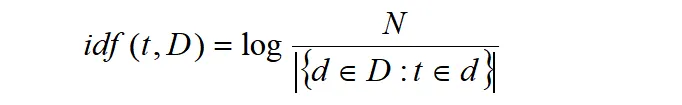

N adalah jumlah total document dalam corpus, N =|D|.
|{d ∈ D : t ∈ d}| = df(t) , adalah jumlah dokumen yang mengandung term t. IDF juga dapat dituliskan dalam bentuk,

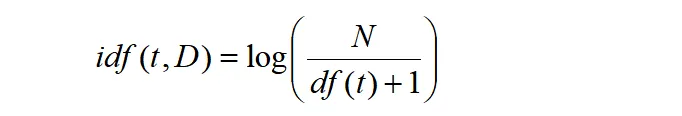

Penambahan 1 untuk menghindari pembagian terhadap 0 jika df(t) tidak ditemukan pada corpus.

untuk mencari df(t) pada python kita implementasikan dengan cara berikut,

In [ ]:
# Menghitung Inverse Document Frequency (IDF)
def calculate_idf(corpus):
  #mendefinisikan sebuah kamus kosong idf_dict, yang akan menyimpan nilai IDF untuk setiap kata dalam korpus.
    idf_dict = {}
  #Variabel N dihitung dengan mengambil panjang corpus, yang merepresentasikan jumlah dokumen dalam korpus.
    N = len(corpus)
  #memanggil fungsi calculate_df untuk menghitung Document Frequency (DF) dari setiap kata dalam korpus. 
    df_dict = calculate_df(corpus)
    for word in df_dict:
      #Untuk setiap kata, nilai IDF dihitung menggunakan rumus idf = log(N / df), di mana N adalah jumlah dokumen dalam korpus, dan df adalah Document Frequency dari kata tersebut.
        idf_dict[word] = np.log(N / df_dict[word])
      #Nilai IDF kemudian disimpan dalam idf_dict dengan kata sebagai kunci.
    return idf_dict

## TF-IDF (Term Frequency-Inverse Document Frequency)
TF-IDF (Term Frequency-Inverse Document Frequency) adalah metode yang menggabungkan informasi TF dan IDF. TF-IDF memberikan bobot yang lebih tinggi pada kata-kata yang sering muncul dalam dokumen tertentu (TF tinggi) dan jarang muncul dalam seluruh koleksi dokumen (IDF tinggi). Metode ini digunakan untuk mengevaluasi kepentingan relatif suatu kata dalam konteks dokumen.

### Perhitungan TF-IDF (Term Frequency-Inverse Document Frequency):
TF-IDF(term, document) = TF(term, document) * IDF(term)

Dalam perhitungan TF-IDF, TF(term, document) adalah nilai TF untuk term dalam dokumen tertentu, dan IDF(term) adalah nilai IDF untuk term di seluruh koleksi dokumen.

In [ ]:
# Menghitung TF-IDF
def calculate_tfidf(tf_dict, idf_dict):
    tfidf_dict = {}
    for word in tf_dict:
        if word in idf_dict:
            tfidf_dict[word] = tf_dict[word] * idf_dict[word]
        else:
            tfidf_dict[word] = 0
    return tfidf_dict

In [ ]:
# Menghitung TF-IDF untuk data latih
tf_train = calculate_tf(X_train)
idf_train = calculate_idf(X_train)
tfidf_train = calculate_tfidf(tf_train, idf_train)

# Menghitung TF-IDF untuk data uji
tf_test = calculate_tf(X_test)
tfidf_test = calculate_tfidf(tf_test, idf_train)

In [ ]:
# Menampilkan hasil TF, DF, dan IDF
print("Term Frequency (TF):")
for i, document in enumerate(X_train):
    tf_dict = calculate_tf([document])
    print(f"Document {i+1}:")
    for word, tf in tf_dict.items():
        print(f"{word}: {tf}")
    print()

Output streaming akan dipotong hingga 5000 baris terakhir.
'bagus',: 0.006423982869379015
'jalanjalan',: 0.0021413276231263384
'kelok',: 0.0021413276231263384
'jarak',: 0.0021413276231263384
'kilometer',: 0.0021413276231263384
'tempuh',: 0.004282655246252677
'uhhhh',: 0.0021413276231263384
'lumayan',: 0.004282655246252677
'pasuk',: 0.004282655246252677
'unjung',: 0.004282655246252677
'kena',: 0.0021413276231263384
'retribusi',: 0.006423982869379015
'perak',: 0.0021413276231263384
'orang',: 0.008565310492505354
'ribu',: 0.0021413276231263384
'rupiah',: 0.008565310492505354
'mobil',: 0.010706638115631691
'gw',: 0.014989293361884369
'pikir',: 0.0021413276231263384
'bayar',: 0.004282655246252677
'sudahmasuk',: 0.0021413276231263384
'tanjak',: 0.0021413276231263384
'menit',: 0.0021413276231263384
'pos',: 0.006423982869379015
'karcis',: 0.01284796573875803
'walahhh',: 0.0021413276231263384
'terus',: 0.006423982869379015
'dufan',: 0.0021413276231263384
'cuaca',: 0.004282655246252677
'dingin',

In [ ]:
print("Document Frequency (DF):")
df_train = calculate_df(X_train)
for word, df in df_train.items():
    print(f"{word}: {df}")
print()

Document Frequency (DF):
'wonosobo',: 33
'kunjung',: 38
'kaki',: 12
'tutup',: 9
'sepatu',: 6
'celana',: 1
['jalan',: 11
'arjuna',: 33
'bahan',: 2
'dieng',: 139
'barang',: 2
'tinggal',: 14
'rute',: 2
'wisata',: 82
'jual',: 6
'siap',: 4
'nikmat',: 40
'teman',: 6
'sebut',: 2
'sepeda',: 3
'magelang',: 5
'objek',: 20
'kaos',: 3
'salah',: 17
'kali',: 9
'rugi',: 2
'sarung',: 5
'bukit',: 34
'motor',: 7
'warungwarung',: 2
'atas',: 10
'lewat',: 11
'dingin',: 71
'suhu',: 21
'sikunir',: 35
'jogja',: 7
'kupluk',: 4
'pandang',: 57
'candi',: 73
'wajib',: 11
'indah',: 72
'kunjung']: 4
'jaket',: 18
'tempuh',: 12
'jarak',: 9
'hangat',: 14
'baju',: 8
'jam',: 22
'sunrise',: 36
'kuping',: 1
'lengkap',: 11
'khawatir',: 5
'tanggung',: 3
'tangan',: 9
'warna',: 55
'gunung',: 46
'malam',: 23
'wisata']: 2
'eropa',: 3
'cerita',: 8
'janji',: 2
'danaudanau',: 2
'drastis',: 1
'sindoro',: 3
'purwaceng',: 9
'kawasan',: 23
'obatobatan',: 1
'ladangladang',: 1
'bentang',: 1
'daya',: 3
'foto',: 14
'duduk',: 11
'kaget',: 2

In [ ]:
print("Inverse Document Frequency (IDF):")
for word, idf in idf_train.items():
    print(f"{word}: {idf}")
print()

Inverse Document Frequency (IDF):
'wonosobo',: 1.750516510694006
'kunjung',: 1.6094379124341003
'kaki',: 2.762117422372486
'tutup',: 3.0497994948242666
'sepatu',: 3.455264602932431
'celana',: 5.247024072160486
['jalan',: 2.8491287993621155
'arjuna',: 1.750516510694006
'bahan',: 4.553876891600541
'dieng',: 0.31255013902979434
'barang',: 4.553876891600541
'tinggal',: 2.6079667425452273
'rute',: 4.553876891600541
'wisata',: 0.8403048248962329
'jual',: 3.455264602932431
'siap',: 3.8607297110405954
'nikmat',: 1.55814461804655
'teman',: 3.455264602932431
'sebut',: 4.553876891600541
'sepeda',: 4.148411783492376
'magelang',: 3.6375861597263857
'objek',: 2.2512917986064953
'kaos',: 4.148411783492376
'salah',: 2.41381072810427
'kali',: 3.0497994948242666
'rugi',: 4.553876891600541
'sarung',: 3.6375861597263857
'bukit',: 1.7206635475443246
'motor',: 3.3011139231051727
'warungwarung',: 4.553876891600541
'atas',: 2.9444389791664403
'lewat',: 2.8491287993621155
'dingin',: 0.9843441951191707
'suhu',:

## Mengubah representasi teks ke dalam vektor

In [ ]:
# Mengubah representasi teks ke dalam vektor
def text_to_vector(text, tfidf_dict):
    words = text.split()
    vector = np.zeros(len(tfidf_dict))
    for i, word in enumerate(tfidf_dict):
        if word in words:
            vector[i] = tfidf_dict[word]
    return vector

# Modelling (KNN)

K-Nearest Neighbors (KNN) adalah algoritma klasifikasi yang digunakan dalam pembelajaran mesin untuk melakukan klasifikasi berdasarkan keterkaitan atau kedekatan dengan tetangga terdekat dalam ruang fitur. KNN adalah salah satu algoritma yang sederhana namun efektif dalam klasifikasi data.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
X_train_vector = [text_to_vector(text, tfidf_train) for text in X_train]
X_test_vector = [text_to_vector(text, tfidf_train) for text in X_test]

# Inisialisasi objek KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

# Melatih model KNN dengan data latih
knn_classifier.fit(X_train_vector, y_train)

# Melakukan prediksi pada data uji
y_pred = knn_classifier.predict(X_test_vector)

## Menghitung akurasi

In [ ]:
# Menghitung akurasi model dengan membandingkan label yang sebenarnya (y_test) dengan label yang diprediksi (y_pred) dari data uji.
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi: {:.2f}%".format(accuracy * 100))

Akurasi: 83.33%


"{:.2f}%" adalah bagian dari string formatting yang digunakan untuk memformat nilai numerik sebagai persentase dengan dua angka desimal.

Pada bagian "{:.2f}", ":" menandakan awal dari spesifikasi format, ".2" menandakan bahwa angka akan diformat dengan dua angka di belakang koma, dan "f" menandakan bahwa angka yang akan diformat adalah floating point (desimal).

Kemudian, tanda "%" menunjukkan bahwa angka tersebut akan diformat sebagai persentase.

- `"Akurasi: {:.2f}%"` adalah string yang akan dicetak. Bagian `{:.2f}` digunakan untuk menyisipkan nilai akurasi dengan format dua angka desimal.
- `format(accuracy * 100)` digunakan untuk memformat nilai akurasi, `accuracy * 100`, dengan format yang ditentukan sebelumnya.
- Hasil akurasi, yang merupakan nilai numerik, akan diformat sebagai persentase dengan dua angka desimal menggunakan string formatting.
- Akhirnya, hasilnya akan dicetak ke layar. Misalnya, jika nilai akurasi adalah 0.8333, maka hasilnya akan dicetak sebagai "Akurasi: 83.33%".

##  Menampilkan label prediksi

Fungsi enumerate digunakan untuk mengiterasi sebuah objek yang berupa iterable (seperti list, tuple, atau string) dan mengembalikan pasangan nilai indeks dan elemen saat ini dalam setiap iterasi. Dengan menggunakan fungsi enumerate, Anda dapat dengan mudah mengakses indeks dan elemen dalam sebuah loop.

Dalam konteks kode yang diberikan, fungsi enumerate digunakan untuk memberikan nomor urutan pada setiap hasil prediksi dan memudahkan penampilan ulasan dan sentimen yang bersangkutan.

In [ ]:
# Menampilkan label prediksi dan ulasan
print("Label Prediksi:")
# memulai sebuah perulangan yang beriterasi melalui label yang diprediksi (y_pred) dan ulasan pengujian (X_test) yang sesuai.
# Fungsi zip() menggabungkan elemen-elemen dari y_pred dan X_test menjadi pasangan-pasangan
# fungsi enumerate() menambahkan indeks (i) pada setiap pasangan.
for i, (label, ulasan) in enumerate(zip(y_pred, X_test)):
    # mencetak indeks dari data yang sedang diproses saat ini. Indeks ditampilkan sebagai "Data Uji" diikuti oleh nilai indeks (i+1).
    print(f"Data Uji {i+1}:")
    # mencetak ulasan (ulasan) untuk data yang sedang diproses saat ini.
    print(f"Ulasan: {ulasan}")
    # mencetak label yang diprediksi (label) untuk data yang sedang diproses saat ini.
    print(f"Label: {label}")
    # mencetak sebuah baris kosong, menciptakan pemisahan visual antara label yang diprediksi dan data poin berikutnya.
    print()

Label Prediksi:
Data Uji 1:
Ulasan: ['salah', 'kota', 'impi', 'datang', 'kunjung', 'januari', 'jalan', 'tanjak', 'jalan', 'sempit', 'jantung', 'debar', 'timpal', 'pandang', 'lokasi', 'wisata', 'putar', 'kawasan', 'dieng', 'worth', 'it', 'banget', 'pokok']
Label: negative

Data Uji 2:
Ulasan: ['udara', 'dieng', 'segar', 'danau', 'candi', 'museum', 'sun', 'rise', 'bagus']
Label: negative

Data Uji 3:
Ulasan: ['gunung', 'dieng', 'letak', 'kota', 'wonosobo', 'jawa tengah', 'udara', 'dingin', 'paksa', 'pakai', 'topi', 'gunung', 'tahan', 'dingin', 'objek', 'wisata', 'kunjung', 'kawah', 'ijen', 'candi', 'danau', 'pancawarna', 'dll', 'kes', 'orang', 'pikul', 'belerang', 'puncak', 'gunung', 'tampung', 'timbang', 'sadar', 'tambang', 'belerang', 'yaa', 'hidup', 'hasil', 'tambang', 'belerang', 'puncak', 'gunung', 'turun', 'kebun', 'tepat', 'pabrik', 'kaleng', 'jamur', 'kancing', 'pandang', 'jalan', 'bagus', 'jalan', 'sempit', 'bagus', 'bengkel', 'sekitar', 'kunjung', 'kesini', 'pasti', 'kendara', 